Test stuff

In [1]:
import pathlib

drive = pathlib.Path("/mnt/d/SLS_2021/")
assert drive.exists()

In [2]:
"""
Get a list of all directories that contain images

"""
import os

dirs_with_imgs = []

for root, dirs, files in os.walk(drive):
    if any(file.lower().endswith(".tif") for file in files):
        dirs_with_imgs.append(root)

print(f"{len(dirs_with_imgs)} directories contain images")

356 directories contain images


In [3]:
"""
Choose a directory

"""
import numpy as np

# Choose randomly
directory = np.random.choice(dirs_with_imgs)

# Or choose this one
directory = dirs_with_imgs[120]
print(directory)

/mnt/d/SLS_2021/disk3/P16_T24_new_B3_/rec_16bit_Paganin_0


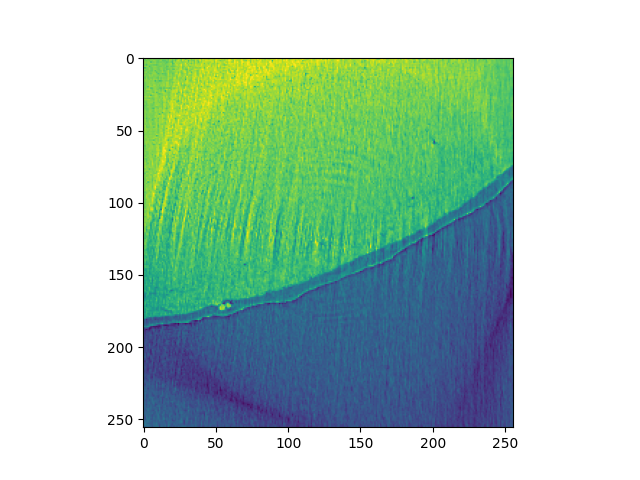

In [4]:
"""
Look through the layers

"""
import matplotlib.pyplot as plt

from PIL import Image
from IPython.display import HTML
import matplotlib.style as mplstyle
from matplotlib.animation import FuncAnimation, FFMpegWriter

%matplotlib widget
mplstyle.use("fast")

# Create animations directory
if not os.path.exists("animations"):
    os.mkdir("animations")

paths = list(pathlib.Path(directory).glob("*.tif"))
indices = list(range(len(paths)))[::10]

def process_image(image: Image.Image) -> np.ndarray:
    """
    Downsamples

    Normalises pixel values to between 0 and 1

    """
    retval = image.resize((256, 256))
    array = np.array(retval)

    return (array - array.min()) / (array.max() - array.min())

images = [process_image(Image.open(paths[i])) for i in indices]
plt.figure()
plt.imshow(images[0])

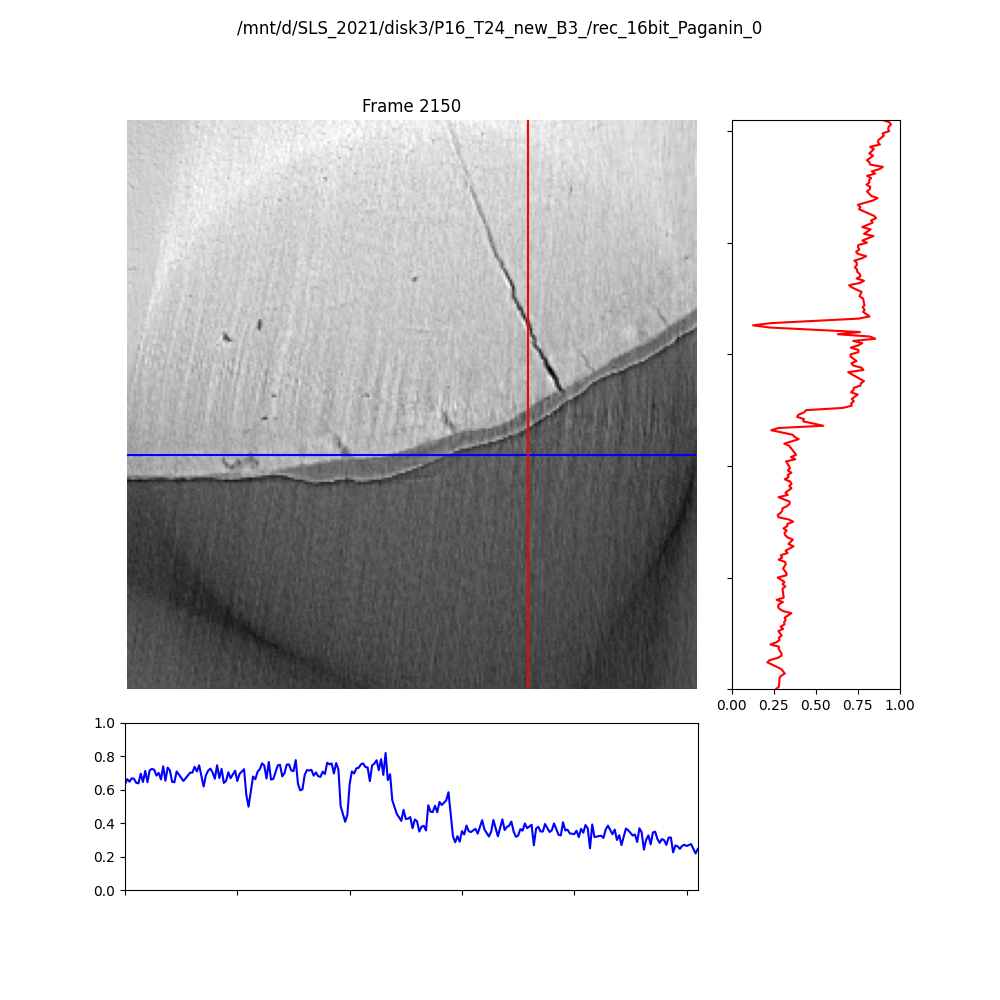

In [5]:
""" Plot it """
fig, axes = plt.subplot_mosaic("AAAB\nAAAB\nAAAB\nCCC.", figsize=(10, 10))
fig.suptitle(directory)

im = axes["A"].imshow(images[0], cmap="grey")

# Draw lines on the axes
xindex, yindex = 180, 150
axes["A"].axhline(yindex, color="blue")
axes["A"].axvline(xindex, color="red")


# Plot slices
x_points = np.arange(len(images[0][0]))
y_points = np.arange(len(images[0][:, 0]))[::-1]

vline, = axes["B"].plot(images[0][:, xindex], y_points, color="red")
axes["B"].set_ylim(y_points[-1], y_points[0])
axes["B"].set_xlim(0, 1)

hline, = axes["C"].plot(x_points, images[0][yindex], color="blue")
axes["C"].set_xlim(x_points[0], x_points[-1])
axes["C"].set_ylim(0, 1)

axes["A"].set_axis_off()
axes["B"].set_yticklabels([])
axes["C"].set_xticklabels([])

def update(i):
    img = images[i]

    im.set_data(img)

    vline.set_xdata(img[:, xindex])
    hline.set_ydata(img[yindex])

    axes["A"].set_title(f"Frame {indices[i]}")

    return (im, vline, hline)


fps = 24
anim = FuncAnimation(fig, update, interval=1000 / 24, blit=True, frames=len(images))


anim.save(
    f"animations/{directory[1:].replace('/', '_')}.mp4", writer=FFMpegWriter(fps=fps)
)

In [ ]:
"""
Sum the layers

"""